In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###################################
############ CUSTOMERS ############
###################################

In [2]:
customers = pd.read_csv("customers.csv")
print(customers.sort_values("birth", ascending=True))
print("le client le plus vieux est né en ",customers.birth.sort_values().iloc[0])
print("le client le plus jeune est né en ",customers.birth.sort_values().iloc[-1])
print("pour un total de ",customers["sex"].value_counts().sum(),"clients dont",customers["sex"].value_counts().f," femmes et ",customers["sex"].value_counts().m," hommes.")
print("nombre de NaN :")
print(customers.isna().sum())
print("nous avons", customers.client_id.value_counts().sum() ,"clients distincts")
customers['age'] = ((2022-customers['birth'])).astype(int) #supposons que nous sommes en 2022, derniere annee transactions
del customers['birth']
print("le client le plus vieux a ",customers.age.max()," ans.")
print("le client le plus jeune a ",customers.age.min()," ans.")

     client_id sex  birth
4569     c_577   m   1929
2491    c_8362   f   1929
418     c_5302   m   1929
1086    c_3218   f   1930
5138    c_7232   f   1930
...        ...  ..    ...
7949    c_2053   f   2004
1130    c_1566   m   2004
5433    c_5436   f   2004
5642    c_5902   f   2004
7530    c_2785   f   2004

[8623 rows x 3 columns]
le client le plus vieux est né en  1929
le client le plus jeune est né en  2004
pour un total de  8623 clients dont 4491  femmes et  4132  hommes.
nombre de NaN :
client_id    0
sex          0
birth        0
dtype: int64
nous avons 8623 clients distincts
le client le plus vieux a  93  ans.
le client le plus jeune a  18  ans.


In [3]:
import scipy.stats as st
toto=customers["age"].value_counts()
toto = toto.to_frame()
toto.reset_index(inplace=True)
toto.rename(columns={"age":"nb"},inplace=True)
toto.rename(columns={"index":"age"},inplace=True)
print("Coefficient de correlation (R²): ")
(st.pearsonr(toto.age, toto.nb)[0])**2

Coefficient de correlation (R²): 


0.6872895060919529

In [4]:
toto

,age,nb
0,18,440
1,43,215
2,34,207
3,36,203
4,44,199
...,...,...
71,89,8
72,90,6
73,92,4
74,91,4


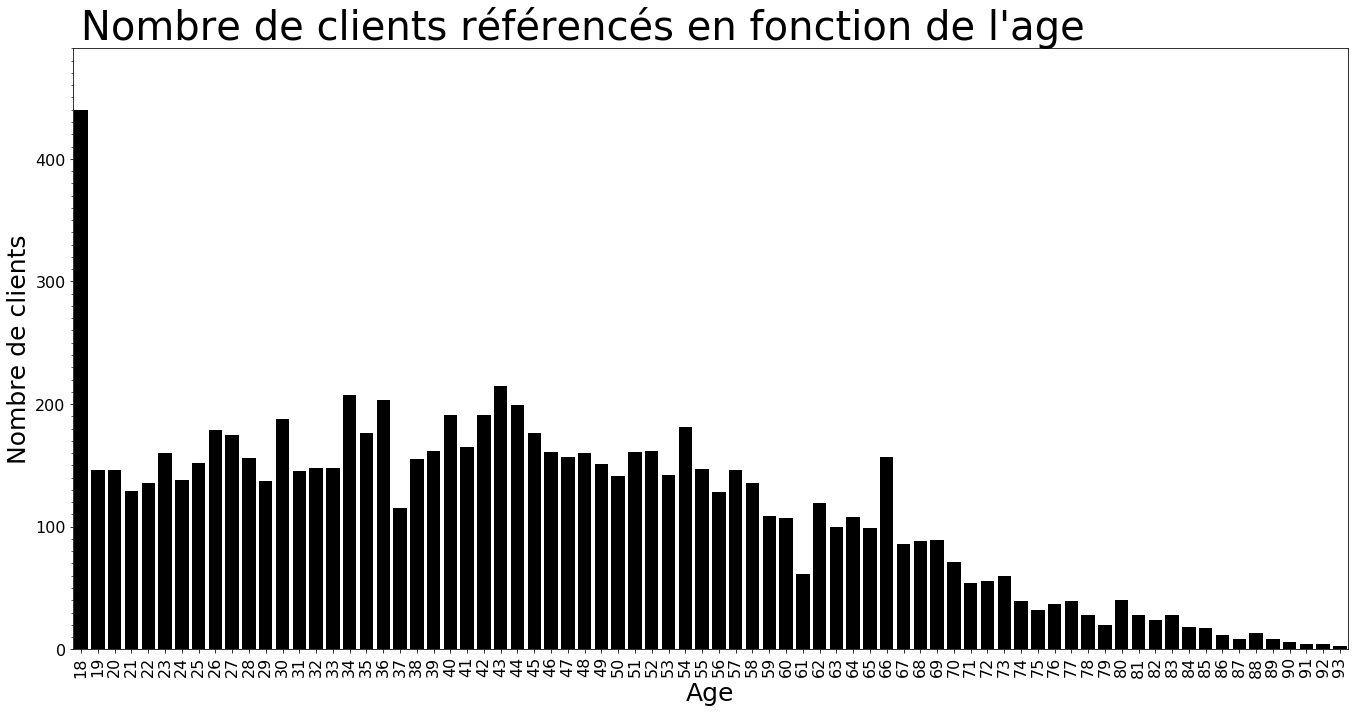

In [5]:
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="age",data=customers, color='k', palette=None,dodge="True")
plt.title("Nombre de clients référencés en fonction de l'age                    ", fontsize=40)
plt.xlabel("Age",fontsize=25)
plt.ylabel("Nombre de clients",fontsize=25)
plt.xticks(fontsize = 16,color='k',rotation = 90)
plt.yticks(color='k',fontsize = 16)
plt.tight_layout()
plt.gca().yaxis.set_ticks(range(0, 500, 10), minor = True)
plt.draw()
#plt.savefig("1.jpg",bbox="tight")

-
Moyenne:
 43.71912327496231
Médiane:
 43.0
Mode:
 0    18
dtype: int32
Variance:
 286.23747147999364
Ecart-type:
 16.91855405996605
skewness empirique:
 0.36100192847210094
kurtosis empirique:
 -0.6368897975660262


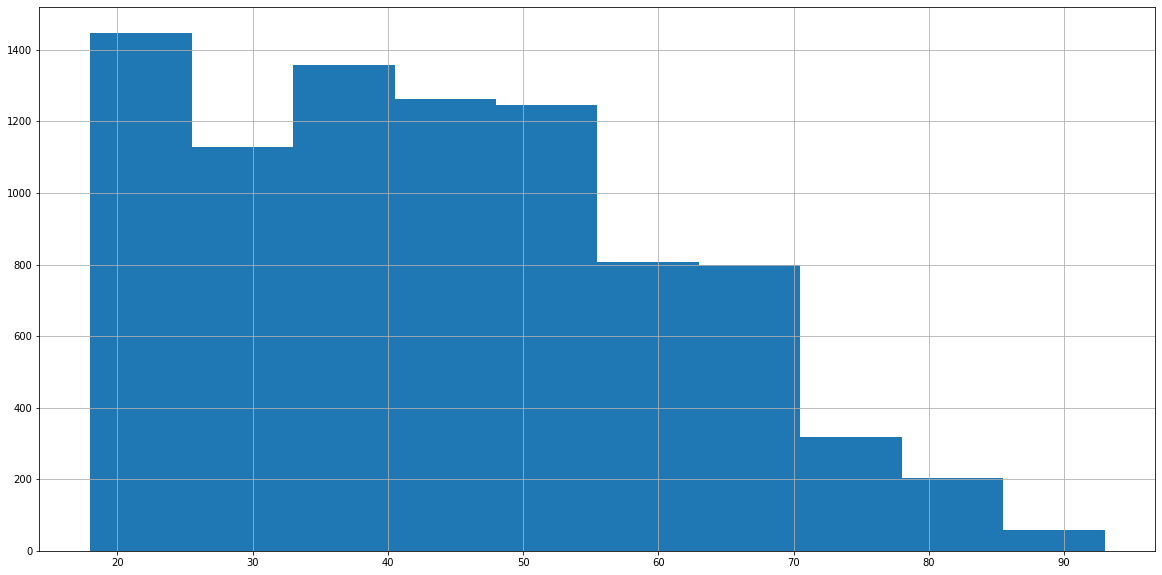

In [6]:
import matplotlib.pyplot as plt
subset = customers.copy() # Création du sous-échantillon
print("-")
print("Moyenne:\n",subset['age'].mean())
print("Médiane:\n",subset['age'].median())
print("Mode:\n",subset['age'].mode())
print("Variance:\n",subset['age'].var(ddof=0))
print("Ecart-type:\n",subset['age'].std(ddof=0))
print("skewness empirique:\n",subset['age'].skew())
print("kurtosis empirique:\n",subset['age'].kurtosis())
subset["age"].hist() # Crée l'histogramme
plt.show()

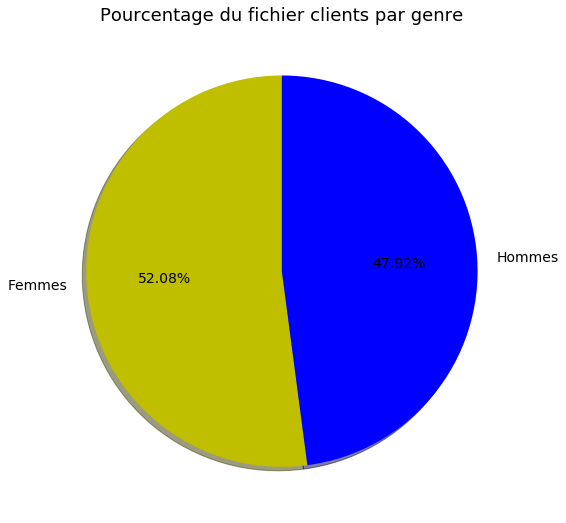

In [7]:
momo=customers["sex"].value_counts()
plt.rcParams["figure.figsize"]=[9,9]
plt.pie(momo.values, labels=['Femmes', 'Hommes'],autopct='%1.2f%%',shadow=True,startangle=90 , colors=['y', 'b'], textprops={'fontsize': 14})
plt.title("Pourcentage du fichier clients par genre",fontsize=18)
plt.draw()
#plt.savefig("2.jpg",bbox="tight")

In [8]:
customers

,client_id,sex,age
0,c_4410,f,55
1,c_7839,f,47
2,c_1699,f,38
3,c_5961,f,60
4,c_5320,m,79
...,...,...,...
8618,c_7920,m,66
8619,c_7403,f,52
8620,c_5119,m,48
8621,c_5643,f,54


f    4491
m    4132
Name: sex, dtype: int64


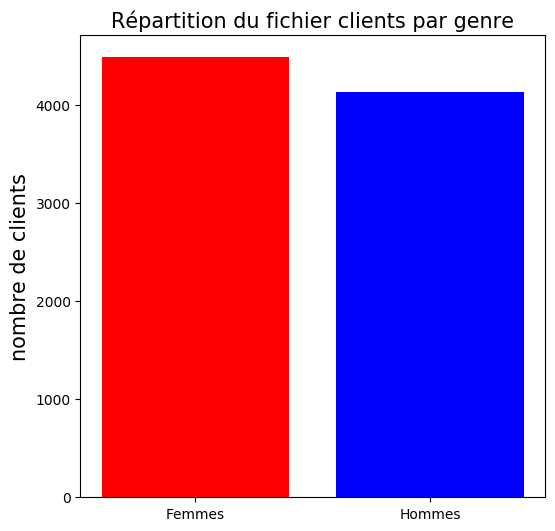

In [9]:
plt.style.use('default')
toto=customers["sex"].value_counts()
plt.rcParams["figure.figsize"]=[6,6]
plt.bar(toto.index,toto,color=["red","blue"])
plt.ylabel("nombre de clients",color="k", fontsize=15)
plt.title("Répartition du fichier clients par genre",color="k", fontsize=15)
plt.xticks(np.arange(2),["Femmes","Hommes"], size='medium')
print(customers["sex"].value_counts())
#plt.savefig("3.jpg",bbox="tight")

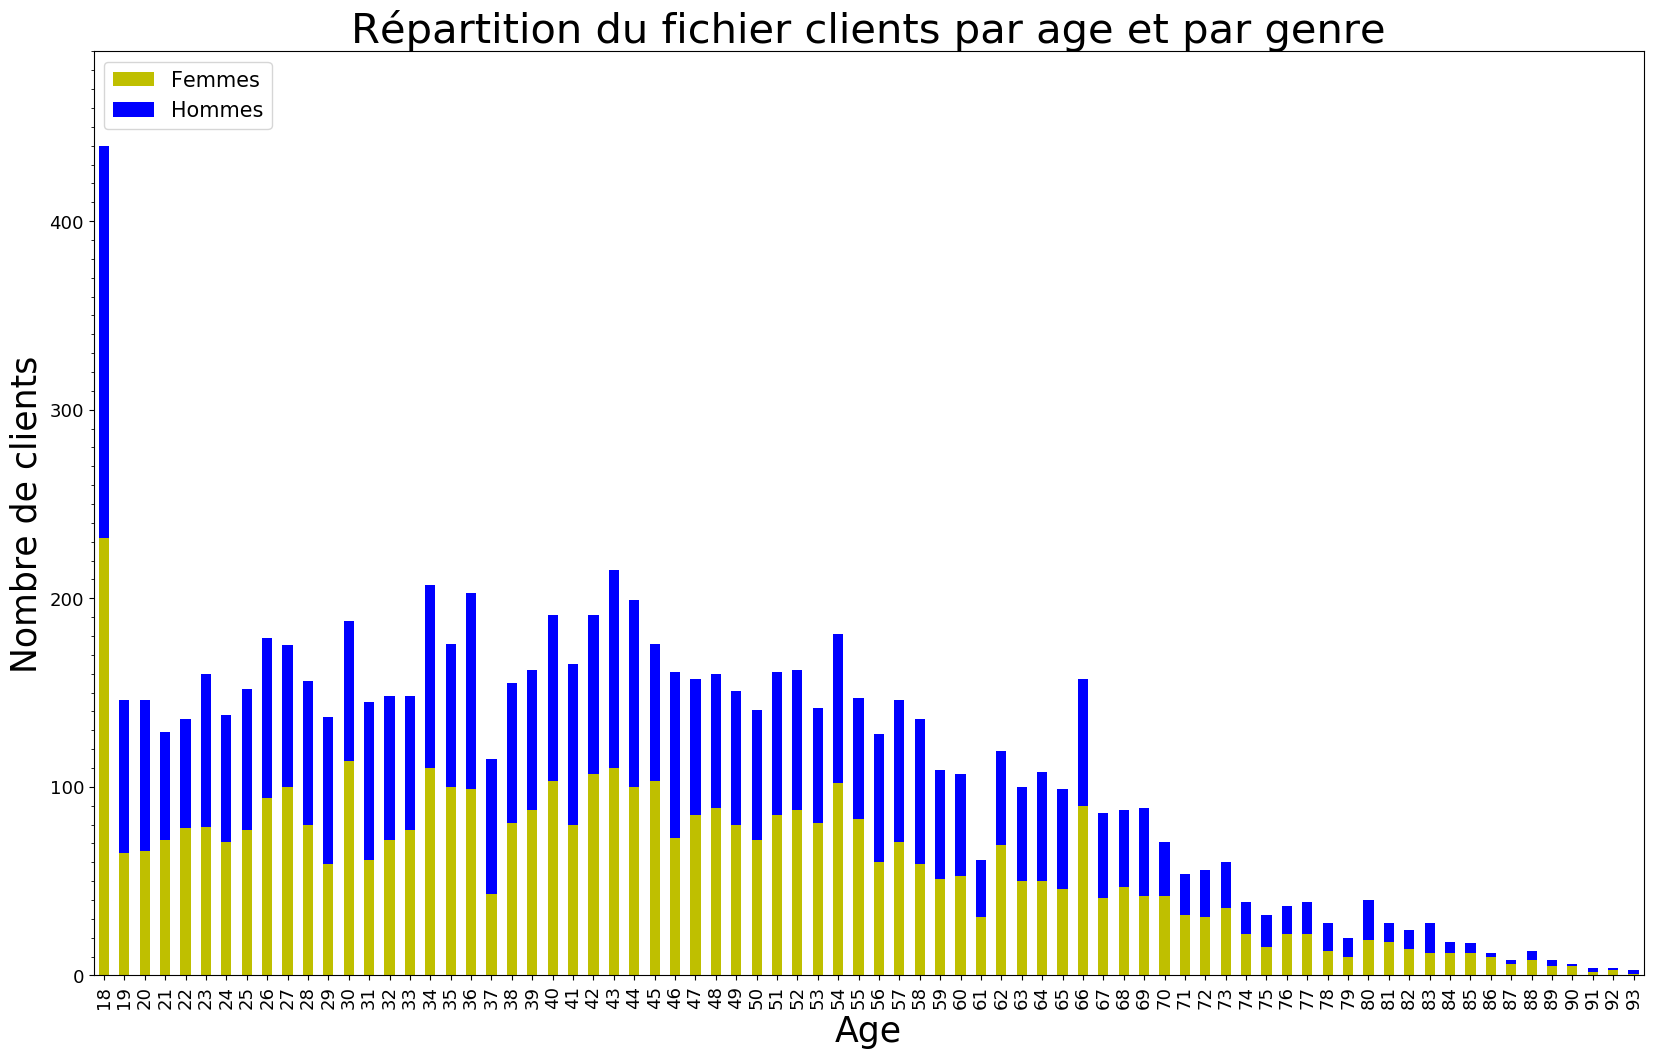

In [10]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[20,12]
df_plot = customers.groupby(['sex', 'age']).size().reset_index().pivot(columns='sex', index='age', values=0)
df_plot.plot.bar(stacked=True, color=['y','b'])
plt.xticks(fontsize = 13,color='k', rotation = 90)
plt.yticks(fontsize = 13,color='k')
plt.ylabel("Nombre de clients",color='k',fontsize=25)
plt.xlabel("Age", color='k',fontsize=25)
plt.title("Répartition du fichier clients par age et par genre", fontsize=30)
plt.gca().yaxis.set_ticks(range(0, 500, 10), minor = True)
plt.legend(loc=2,labels=["Femmes","Hommes"], fontsize=15)
plt.grid(False)
plt.draw()
#plt.savefig("4.jpg",bbox="tight")

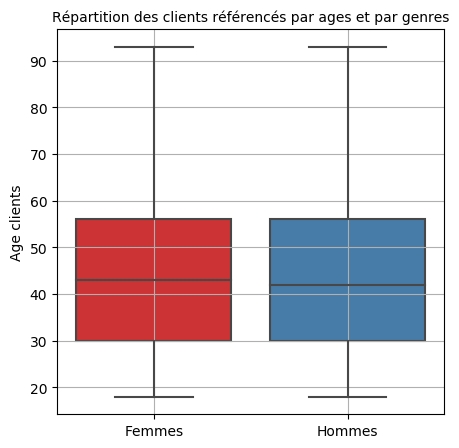

In [11]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[5,5]
sns.boxplot(x='sex',y='age',data=customers, showfliers=False,dodge=True, palette="Set1")
plt.ylabel("Age clients",color='k',fontsize=10)
plt.xlabel(None)
plt.title("Répartition des clients référencés par ages et par genres", fontsize=10)
plt.xticks(np.arange(2),["Femmes","Hommes"], size='medium')
plt.grid()
plt.draw()
#plt.savefig("5.jpg",bbox="tight")

###################################
############ PRODUCTS #############
###################################

In [12]:
products = pd.read_csv("products.csv")
products.sort_values("price", ascending=False)
print("nombre de NaN :")
print(products.isna().sum())
products.sort_values("price", ascending=False)

nombre de NaN :
id_prod    0
price      0
categ      0
dtype: int64


,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2
...,...,...,...
1211,0_1844,0.77,0
370,0_120,0.66,0
2272,0_528,0.62,0
2355,0_202,0.62,0


le produit le moins cher est à  0.62  €.
le produit le plus cher est à  300  €.
Mode:
 0    4.99
dtype: float64
Variance:
 890.738548716535
Ecart-type:
 29.845243318099033
skewness empirique:
 3.7984080847848216
kurtosis empirique:
 17.947013696035576
nous avons 3286 produits distincts
nombre de references par categorie 
0    2308
1     739
2     239
Name: categ, dtype: int64
nombre de Nan :
id_prod    0
price      0
categ      0
dtype: int64
--------------------
pour la catégorie  0  nous avons :
2308 produits.
avec comme tarif moyen : 11.73279462738311
avec comme tarif médian : 10.32
Mode:
 0    4.99
dtype: float64
Variance:
 57.21584717272701
Ecart-type:
 7.5641157561691905
skewness empirique:
 0.8387209779498815
kurtosis empirique:
 0.3324478551097818
le produit le moins cher est à  0.62  €.
le produit le plus cher est à  40.99  €.
--------------------
pour la catégorie  1  nous avons :
739 produits.
avec comme tarif moyen : 25.53142083897155
avec comme tarif médian : 22.99
Mode:
 

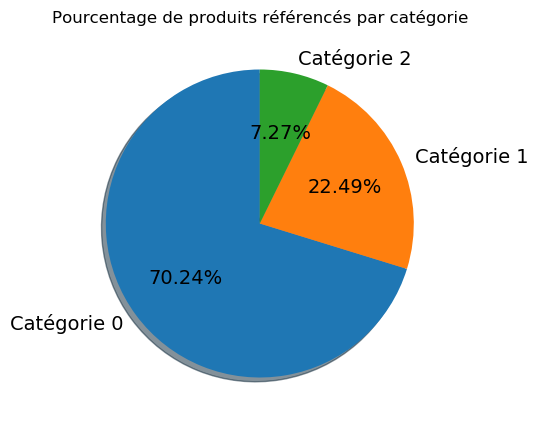

In [13]:
products = products[(products["price"] > 0)] #Nous retirons la ligne 731 dont le prix du produit T_0 est -1
products.sort_values("price", inplace = True)
products.drop_duplicates(keep = False, inplace = True) 
print("le produit le moins cher est à ",products.price.min()," €.")
print("le produit le plus cher est à ",int(products.price.max())," €.")
print("Mode:\n",products.price.mode())
print("Variance:\n",products.price.var(ddof=0))
print("Ecart-type:\n",products.price.std(ddof=0))
print("skewness empirique:\n",products.price.skew())
print("kurtosis empirique:\n",products.price.kurtosis())
print("nous avons", len(products) ,"produits distincts")
print("nombre de references par categorie ")
print (products['categ'].value_counts())
print("nombre de Nan :")
print(products.isna().sum())
for cat in products['categ'].unique():
    subset = products[products.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print("pour la catégorie ",(cat)," nous avons :")
    print (len(subset['categ']),"produits.")
    print("avec comme tarif moyen :",subset['price'].mean())
    print("avec comme tarif médian :",subset['price'].median())
    print("Mode:\n",subset['price'].mode())
    print("Variance:\n",subset['price'].var(ddof=0))
    print("Ecart-type:\n",subset['price'].std(ddof=0))
    print("skewness empirique:\n",subset['price'].skew())
    print("kurtosis empirique:\n",subset['price'].kurtosis())
    print("le produit le moins cher est à ",subset['price'].min()," €.")
    print("le produit le plus cher est à ",subset['price'].max()," €.")
momo=products['categ'].value_counts()
plt.title("Pourcentage de produits référencés par catégorie", fontsize=12)
plt.rcParams["figure.figsize"]=[9,9]
plt.pie(momo.values, labels=["Catégorie 0","Catégorie 1","Catégorie 2"],autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 14})
plt.draw()
#plt.savefig("6.jpg",bbox="tight")

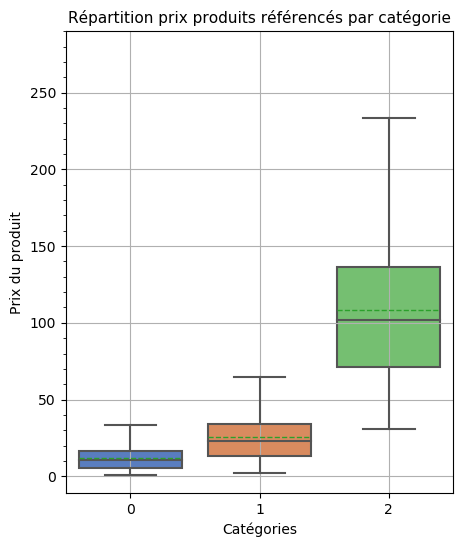

In [14]:
sns.reset_defaults()
fig, ax = plt.subplots()
fig.set_size_inches(5,6)
ax = sns.boxplot(x="categ", y="price", data=products,palette = "muted",showfliers=False, showmeans=True,meanline=True,dodge=False)
plt.title("Répartition prix produits référencés par catégorie", fontsize=11)
plt.xlabel("Catégories",color='k',fontsize=10)
plt.ylabel("Prix du produit",color='k',fontsize=10)
plt.gca().yaxis.set_ticks(range(0, 300, 10), minor = True)
plt.grid(True)
plt.draw()

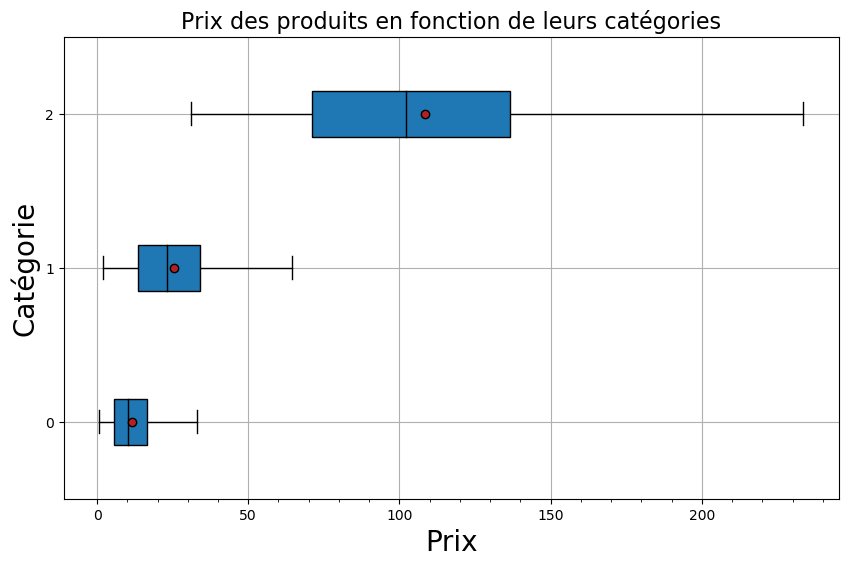

In [15]:
plt.rcParams["figure.figsize"]=[10,6]
X = "categ" # qualitative
Y = "price" # quantitative
sous_echantillon = products.sort_values(by='categ').copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Prix des produits en fonction de leurs catégories", fontsize=16)
plt.xlabel("Prix",color="k",fontsize=20)
plt.ylabel("Catégorie",color="k",fontsize=20)
plt.gca().xaxis.set_ticks(range(0, 250,10), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("7.jpg",bbox="tight")

In [16]:
X = "categ" # qualitative
Y = "price" # quantitative

#sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])#Il existe une correlation entre le prix du produit et sa categorie: l'eta carré

0.6951593460624839

###################################
########### TRANSACTIONS ##########
###################################

In [17]:
transactions = pd.read_csv("transactions.csv",parse_dates=[1])
print("nombre de NaN :")
print(customers.isna().sum())
transactions.sort_values("date", ascending=True)

nombre de NaN :
client_id    0
sex          0
age          0
dtype: int64


,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
317345,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
203418,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
203239,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
245346,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1


In [18]:
transactions_test = transactions[transactions.date.str.contains('test',case=False)]
transactions_test

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [19]:
transactions  = transactions[~transactions.date.str.contains("test")]
transactions.sort_values("date", ascending=True)#nous retirons les 200 lignes de test contenant le produit référencé T_0

,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
208601,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787
242599,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460
6245,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876
301528,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460


In [20]:
transactions.drop_duplicates(keep = False, inplace = True) 
transactions.date.sort_values()

176588    2021-03-01 00:01:07.843138
95285     2021-03-01 00:02:26.047414
216737    2021-03-01 00:02:38.311413
180767    2021-03-01 00:04:54.559692
293481    2021-03-01 00:05:18.801198
                     ...            
208601    2022-02-28 23:56:57.196281
242599    2022-02-28 23:56:57.561424
6245      2022-02-28 23:57:12.741573
301528    2022-02-28 23:59:02.381670
79892     2022-02-28 23:59:58.040472
Name: date, Length: 336816, dtype: object

In [21]:
print("la transaction la plus ancienne date du ",transactions.date.sort_values().iloc[0])
print("la transaction la plus récente date du ",transactions.date.sort_values().iloc[-1])
print("nous avons", len(transactions) ,"transactions distinctes")
print("nombre de Nan :")
print(transactions.isna().sum())

la transaction la plus ancienne date du  2021-03-01 00:01:07.843138
la transaction la plus récente date du  2022-02-28 23:59:58.040472
nous avons 336816 transactions distinctes
nombre de Nan :
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [22]:
transactions=transactions.rename(columns={"date":"fulldate"})
transactions['jour'] = pd.to_datetime(transactions['fulldate']).dt.strftime("%Y:%m:%d")
transactions['heure'] = pd.to_datetime(transactions['fulldate']).dt.strftime("%H:%M")
transactions['mois'] = pd.to_datetime(transactions['fulldate']).dt.strftime("%Y:%m")

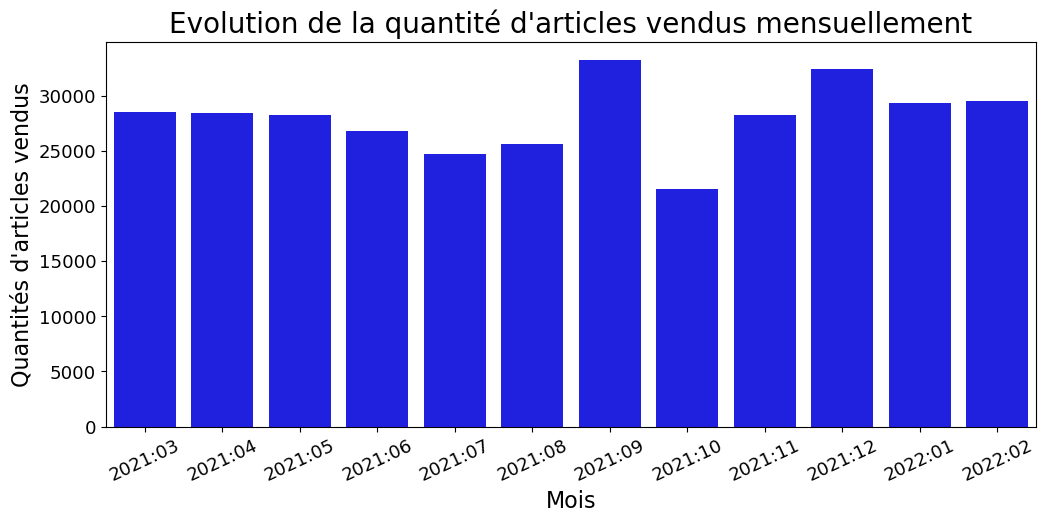

In [23]:
plt.rcParams["figure.figsize"]=[12,5]
transactions.sort_values("mois", inplace = True)
ax = sns.countplot(x="mois",color='b', data=transactions,dodge=False)
plt.title("Evolution de la quantité d'articles vendus mensuellement", fontsize=20)
plt.xlabel("Mois",color='k',fontsize=16)
plt.ylabel("Quantités d'articles vendus",color='k',fontsize=16)
plt.xticks(fontsize = 13,color='k', rotation = 25)
plt.yticks(fontsize = 13,color='k')
plt.draw()
#plt.savefig("8.jpg",bbox="tight")

###################################
########## CONCATENATION ##########
##CUSTOMERS/PRODUCTS/TRANSACTIONS##
###CREATION DF DATA2 (NETTOYE) ####
###################################

In [24]:
#CREATION DATAFRAME DATA (NON NETTOYE)

In [25]:
####concatenation 1/2
data = pd.merge(transactions, products, on=["id_prod"],how="outer", ).copy()
print("nombre de NaN sur DATA:")
print(data.isna().sum())

nombre de NaN sur DATA:
id_prod         0
fulldate       22
session_id     22
client_id      22
jour           22
heure          22
mois           22
price         103
categ         103
dtype: int64


In [26]:
data.shape

(336838, 9)

In [27]:
data[data.price.isna()]
# en cherchant les 103 nan sur price, on remarque que le produit 0_2245 n'a ni prix ni categorie

,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ
313915,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,2021:03:28,10:46,2021:03,NaN,NaN
313916,0_2245,2021-03-29 04:29:29.995701,s_12938,c_1025,2021:03:29,04:29,2021:03,NaN,NaN
313917,0_2245,2021-03-02 15:55:49.728644,s_783,c_8060,2021:03:02,15:55,2021:03,NaN,NaN
313918,0_2245,2021-03-29 02:10:32.403467,s_12886,c_1025,2021:03:29,02:10,2021:03,NaN,NaN
313919,0_2245,2021-03-07 20:00:01.525768,s_3159,c_1189,2021:03:07,20:00,2021:03,NaN,NaN
...,...,...,...,...,...,...,...,...,...
314013,0_2245,2022-02-20 03:50:42.646180,s_167926,c_7287,2022:02:20,03:50,2022:02,NaN,NaN
314014,0_2245,2022-02-07 09:39:59.546556,s_161318,c_554,2022:02:07,09:39,2022:02,NaN,NaN
314015,0_2245,2022-02-20 02:12:36.364179,s_167890,c_662,2022:02:20,02:12,2022:02,NaN,NaN
314016,0_2245,2022-02-25 00:08:08.736068,s_170426,c_6236,2022:02:25,00:08,2022:02,NaN,NaN


In [28]:
data[data.categ.isna()]##pareil pour une recherche sur categ

,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ
313915,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,2021:03:28,10:46,2021:03,NaN,NaN
313916,0_2245,2021-03-29 04:29:29.995701,s_12938,c_1025,2021:03:29,04:29,2021:03,NaN,NaN
313917,0_2245,2021-03-02 15:55:49.728644,s_783,c_8060,2021:03:02,15:55,2021:03,NaN,NaN
313918,0_2245,2021-03-29 02:10:32.403467,s_12886,c_1025,2021:03:29,02:10,2021:03,NaN,NaN
313919,0_2245,2021-03-07 20:00:01.525768,s_3159,c_1189,2021:03:07,20:00,2021:03,NaN,NaN
...,...,...,...,...,...,...,...,...,...
314013,0_2245,2022-02-20 03:50:42.646180,s_167926,c_7287,2022:02:20,03:50,2022:02,NaN,NaN
314014,0_2245,2022-02-07 09:39:59.546556,s_161318,c_554,2022:02:07,09:39,2022:02,NaN,NaN
314015,0_2245,2022-02-20 02:12:36.364179,s_167890,c_662,2022:02:20,02:12,2022:02,NaN,NaN
314016,0_2245,2022-02-25 00:08:08.736068,s_170426,c_6236,2022:02:25,00:08,2022:02,NaN,NaN


In [29]:
zzz = products[products["id_prod"] == "0_2245"].copy()
zzz #le produit n est pas referencé dans products

,id_prod,price,categ


In [30]:
www = data[data["id_prod"] == "0_2245"].copy()
www.sort_values("jour", ascending = False)

,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ
314012,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,2022:02:28,18:08,2022:02,NaN,NaN
314016,0_2245,2022-02-25 00:08:08.736068,s_170426,c_6236,2022:02:25,00:08,2022:02,NaN,NaN
314010,0_2245,2022-02-25 06:36:49.557289,s_170548,c_2242,2022:02:25,06:36,2022:02,NaN,NaN
314007,0_2245,2022-02-24 04:18:45.054650,s_169978,c_5953,2022:02:24,04:18,2022:02,NaN,NaN
314015,0_2245,2022-02-20 02:12:36.364179,s_167890,c_662,2022:02:20,02:12,2022:02,NaN,NaN
...,...,...,...,...,...,...,...,...,...
313915,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,2021:03:28,10:46,2021:03,NaN,NaN
313920,0_2245,2021-03-23 15:57:44.266387,s_10427,c_5869,2021:03:23,15:57,2021:03,NaN,NaN
313919,0_2245,2021-03-07 20:00:01.525768,s_3159,c_1189,2021:03:07,20:00,2021:03,NaN,NaN
313917,0_2245,2021-03-02 15:55:49.728644,s_783,c_8060,2021:03:02,15:55,2021:03,NaN,NaN


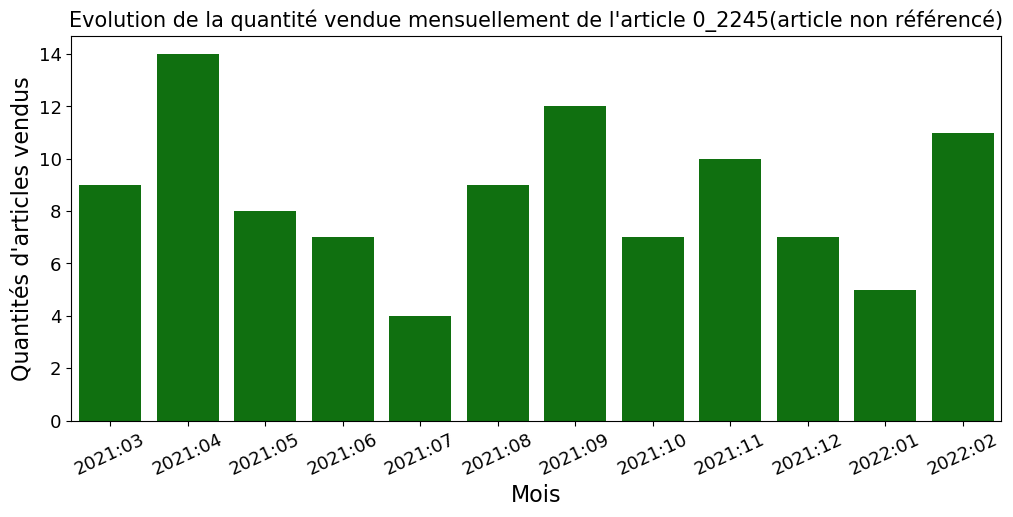

In [31]:
plt.rcParams["figure.figsize"]=[12,5]
ax = sns.countplot(x="mois",color='g', data=www,dodge=False)
plt.title("Evolution de la quantité vendue mensuellement de l'article 0_2245(article non référencé)",color='k', fontsize=15)
#plt.xlabel("Mois",color='k',fontsize=16)
plt.xlabel("Mois",color='k',fontsize=16)
plt.ylabel("Quantités d'articles vendus",color='k',fontsize=16)
plt.xticks(fontsize = 13,color='k', rotation = 25)
plt.yticks(fontsize = 13,color='k')
plt.draw()
#plt.savefig("9.jpg",bbox="tight")
####le produit a malgres tout ete vendu pendant les 12 mois du dataframe ce qui laisse supposer qu il a ete retiré des
####produits referencé tres recement car il n est plus en vente
#### 2 solutions , soit on le retire du dataframe soit on essaye de trouver un produit avec la meme frequence de 
####vente journaliere ou qui s en rapproche le plus ????
####JE RETIRE LE PRODUIT 0_2245

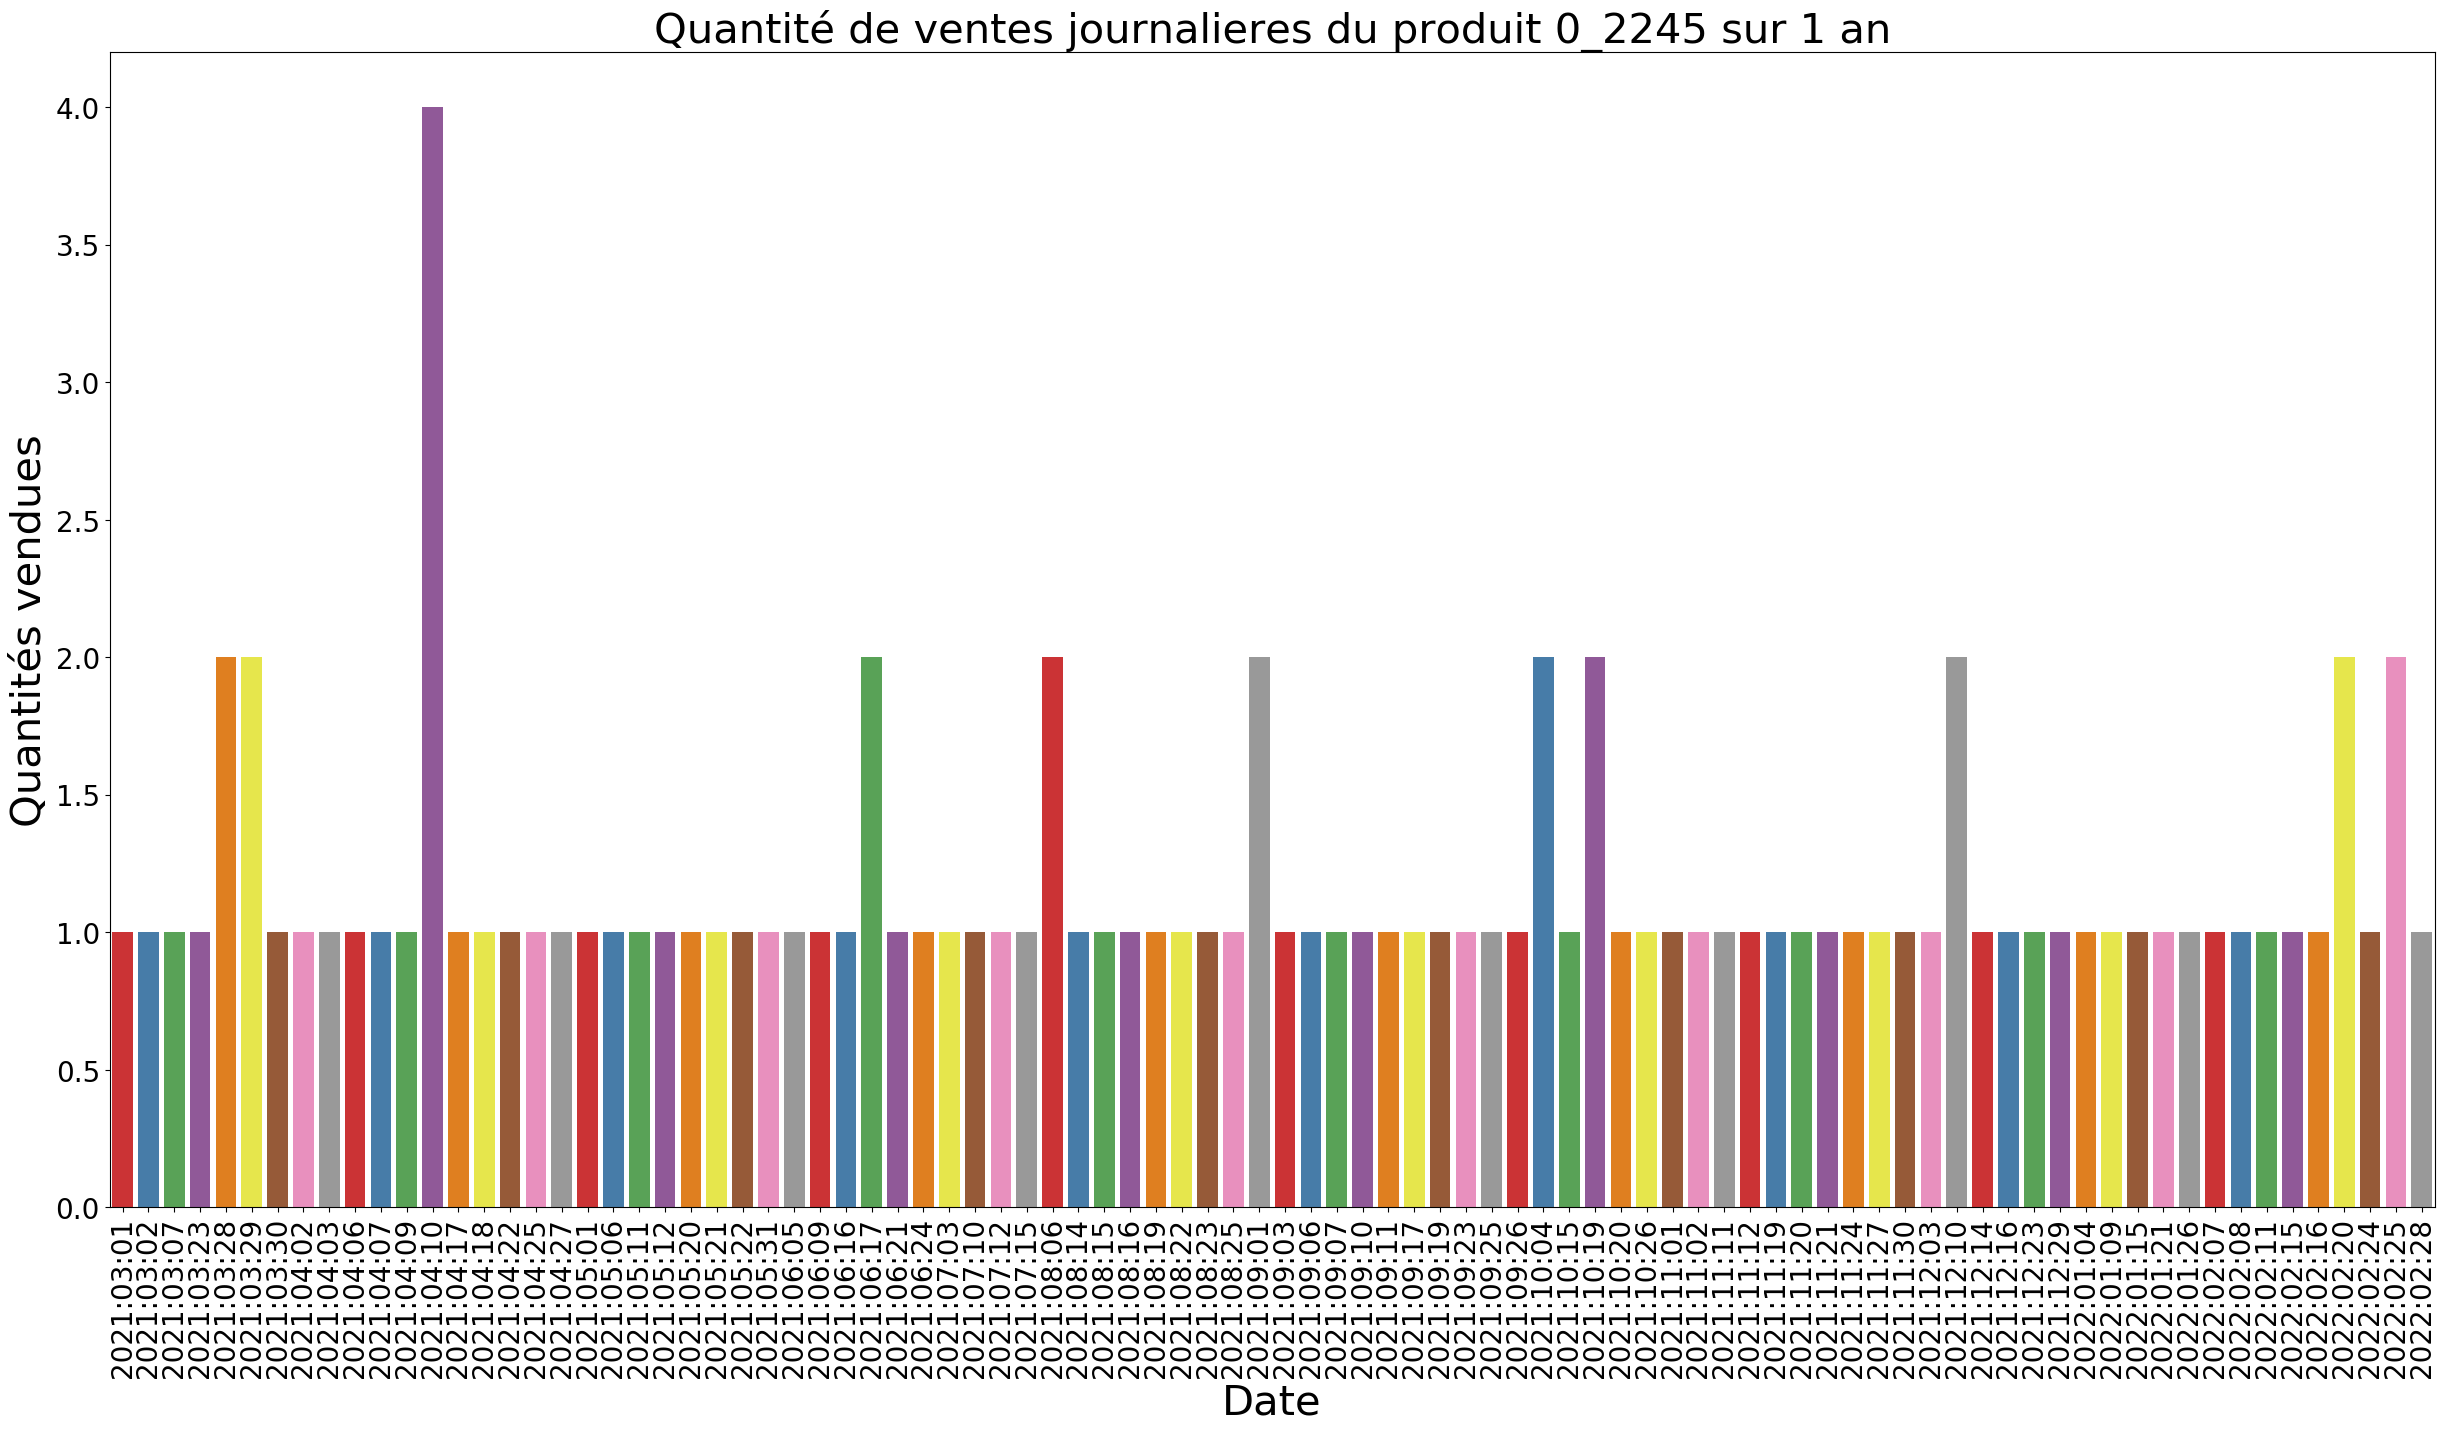

In [32]:
sns.reset_defaults()
www.sort_values(by='fulldate', inplace=True)
plt.rcParams["figure.figsize"]=[30,15]
sns.countplot(x="jour",data=www,palette="Set1")
plt.title("Quantité de ventes journalieres du produit 0_2245 sur 1 an", fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Quantités vendues",fontsize=30)
plt.xticks(fontsize = 20,color='k', rotation = 90)
plt.yticks(fontsize = 20,color='k')
plt.draw()
#plt.savefig("10.jpg",bbox="tight")
####on remarque que le produit  s est vendu en petites quantités pendant toute l'année, a donc du etre dereferencé recement

In [33]:
data[data.session_id.isna()]
#22 produits référencés ne figurent pas dans les transactions et n'ont donc pas ete achetés.

,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ
336816,0_1620,NaN,NaN,NaN,NaN,NaN,NaN,0.80,0.0
336817,0_1014,NaN,NaN,NaN,NaN,NaN,NaN,1.15,0.0
336818,0_1780,NaN,NaN,NaN,NaN,NaN,NaN,1.67,0.0
336819,0_310,NaN,NaN,NaN,NaN,NaN,NaN,1.94,0.0
336820,0_322,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0
336821,0_1645,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0
336822,0_525,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0
336823,0_1119,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0
336824,0_1062,NaN,NaN,NaN,NaN,NaN,NaN,20.08,0.0
336825,0_2308,NaN,NaN,NaN,NaN,NaN,NaN,20.28,0.0


In [34]:
data = data.dropna() #on efface les 125 lignes nan /103 pour l'article 0_2245 
#et les 22 produits référencés qui n'ont pas ete achetés. 
data

,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ
0,1_264,2021-03-28 17:16:26.325707,s_12716,c_6624,2021:03:28,17:16,2021:03,16.07,1.0
1,1_264,2021-03-22 20:13:42.678837,s_10033,c_162,2021:03:22,20:13,2021:03,16.07,1.0
2,1_264,2021-03-17 19:21:43.966158,s_7712,c_2767,2021:03:17,19:21,2021:03,16.07,1.0
3,1_264,2021-03-24 12:20:16.513686,s_10810,c_6634,2021:03:24,12:20,2021:03,16.07,1.0
4,1_264,2021-03-15 05:58:29.261538,s_6542,c_1089,2021:03:15,05:58,2021:03,16.07,1.0
...,...,...,...,...,...,...,...,...,...
336811,0_1498,2022-02-19 08:31:04.439133,s_167516,c_1938,2022:02:19,08:31,2022:02,2.48,0.0
336812,0_2295,2022-02-06 20:58:10.399876,s_161046,c_7204,2022:02:06,20:58,2022:02,1.99,0.0
336813,0_1576,2022-02-20 21:09:34.520763,s_168305,c_7954,2022:02:20,21:09,2022:02,2.29,0.0
336814,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,2022:02:19,14:51,2022:02,86.99,2.0


In [35]:
####concatenation 2/2
data = pd.merge(data, customers,on=["client_id"],how="outer").copy()
print("nombre de NaN sur DATA:")
print(data.isna().sum())
print(data.shape)

nombre de NaN sur DATA:
id_prod       23
fulldate      23
session_id    23
client_id      0
jour          23
heure         23
mois          23
price         23
categ         23
sex            0
age            0
dtype: int64
(336736, 11)


In [36]:
data[data.session_id.isna()]
#23 clients qui n'ont pas acheté cette annee ne figurent donc pas dans les transactions,
#23 lignes qui vont etres effaces lors du passage en data2

,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ,sex,age
336713,NaN,NaN,NaN,c_8253,NaN,NaN,NaN,NaN,NaN,f,21
336714,NaN,NaN,NaN,c_3789,NaN,NaN,NaN,NaN,NaN,f,25
336715,NaN,NaN,NaN,c_4406,NaN,NaN,NaN,NaN,NaN,f,24
336716,NaN,NaN,NaN,ct_0,NaN,NaN,NaN,NaN,NaN,f,21
336717,NaN,NaN,NaN,c_2706,NaN,NaN,NaN,NaN,NaN,f,55
336718,NaN,NaN,NaN,c_3443,NaN,NaN,NaN,NaN,NaN,m,63
336719,NaN,NaN,NaN,c_4447,NaN,NaN,NaN,NaN,NaN,m,66
336720,NaN,NaN,NaN,c_3017,NaN,NaN,NaN,NaN,NaN,f,30
336721,NaN,NaN,NaN,c_4086,NaN,NaN,NaN,NaN,NaN,f,30
336722,NaN,NaN,NaN,c_6930,NaN,NaN,NaN,NaN,NaN,m,18


In [37]:
#CREATION DF DATA2 (NETTOYE) SUR LEQUEL CHAQUE LIGNE REPRESENTE LA TRANSACTION D'UN PRODUIT VENDU

In [38]:
data2 = data.dropna().copy()
data2['categ'] = data2['categ'].astype(int)
data2['categ'] = data2['categ'].astype(str)
data2['age'] = data2['age'].astype(int)
print(data2.isna().sum())
print (data2.shape)
data2.to_csv("data2.csv")
data2.head(5)

id_prod       0
fulldate      0
session_id    0
client_id     0
jour          0
heure         0
mois          0
price         0
categ         0
sex           0
age           0
dtype: int64
(336713, 11)


,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ,sex,age
0,1_264,2021-03-28 17:16:26.325707,s_12716,c_6624,2021:03:28,17:16,2021:03,16.07,1,m,69
1,0_639,2021-06-25 23:51:24.675779,s_53815,c_6624,2021:06:25,23:51,2021:06,4.99,0,m,69
2,1_283,2021-08-23 13:48:33.303659,s_79645,c_6624,2021:08:23,13:48,2021:08,14.99,1,m,69
3,1_431,2022-01-25 22:33:16.220916,s_155155,c_6624,2022:01:25,22:33,2022:01,27.99,1,m,69
4,1_441,2021-12-15 12:48:21.375431,s_134746,c_6624,2021:12:15,12:48,2021:12,24.99,1,m,69


In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336712
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336713 non-null  object 
 1   fulldate    336713 non-null  object 
 2   session_id  336713 non-null  object 
 3   client_id   336713 non-null  object 
 4   jour        336713 non-null  object 
 5   heure       336713 non-null  object 
 6   mois        336713 non-null  object 
 7   price       336713 non-null  float64
 8   categ       336713 non-null  object 
 9   sex         336713 non-null  object 
 10  age         336713 non-null  int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 29.5+ MB
